In this notebook, we will learn  how to sol the Unity ML-Agents environment for the second project of the Deep Reinforcement Learning Nanodegree program.

In [1]:
from unityagents import UnityEnvironment
from sumuk_ddpg_agent import *
import numpy as np
env = UnityEnvironment(file_name='Reacher_Linux_20/Reacher.x86_64')
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
        

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
num_agents = len(env_info.agents)
print(num_agents)
states = env_info.vector_observations
action_size = brain.vector_action_space_size
# get the current state (for each agent)
scores = np.zeros(num_agents)
replaybuffer=ReplayBuffer(int(1e6))
agent=[]
for _ in range(num_agents//5):
    a = DDPGAgent(1024,states.shape[1],action_size,replaybuffer)
    agent.append(a)
print(len(agent))

20
4


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/sumuk/rl/deep-reinforcement-learning/p2_continuous-control/Continuous_control/sumuk_ddpg_agent.py:97: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode 0	Total Average Score: 0.46	Mean: 0.46	Min: 0.00	Max: 1.46	Duration: 161.24
Episode 1	Total Average Score: 0.40	Mean: 0.34	Min: 0.00	Max: 1.13	Duration: 175.24
Episode 2	Total Average Score: 0.42	Mean: 0.47	Min: 0.03	Max: 1.14	Duration: 174.51
Episode 3	Total Average Score: 0.55	Mean: 0.91	Min: 0.09	Max: 2.05	Duration: 178.40
Episode 4	Total Average Score: 0.64	Mean: 1.02	Min: 0.53	Max: 1.94	Duration: 181.33
Episode 5	Total Average Score: 0.70	Mean: 1.01	Min: 0.19	Max: 1.86	Duration: 181.26
Episode 6	Total Average Score: 0.82	Mean: 1.52	Min: 0.40	Max: 3.43	Duration: 185.11
Episode 7	Total Average Score: 0.91	Mean: 1.54	Min: 0.42	Max: 2.90	Duration: 185.79
Episode 8	Total Average Score: 1.01	Mean: 1.80	Min: 1.03	Max: 2.92	Duration: 189.24
Episode 9	Total Average Score: 1.09	Mean: 1.79	Min: 0.16	Max: 3.88	Duration: 194.18
Episode 10	Total Average Score: 1.16	Mean: 1.93	Min: 0.39	Max: 3.58	Duration: 197.57
Episode 11	Total Average Score: 1.26	Mean: 2.33	Min: 0.65	Max: 4.57	Duratio

Episode 94	Total Average Score: 30.22	Mean: 38.06	Min: 35.84	Max: 39.55	Duration: 334.70
Episode 95	Total Average Score: 30.30	Mean: 38.03	Min: 33.93	Max: 39.37	Duration: 335.74
Episode 96	Total Average Score: 30.37	Mean: 37.00	Min: 32.02	Max: 39.61	Duration: 335.16
Episode 97	Total Average Score: 30.44	Mean: 37.67	Min: 35.09	Max: 39.24	Duration: 335.12
Episode 98	Total Average Score: 30.51	Mean: 37.39	Min: 34.46	Max: 39.39	Duration: 335.57
Episode 99	Total Average Score: 30.59	Mean: 37.78	Min: 33.22	Max: 39.31	Duration: 336.15
Episode 100	Total Average Score: 30.97	Mean: 38.45	Min: 37.47	Max: 39.58	Duration: 336.42
Problem Solved after 100 epsisodes!! Total Average score: 30.97


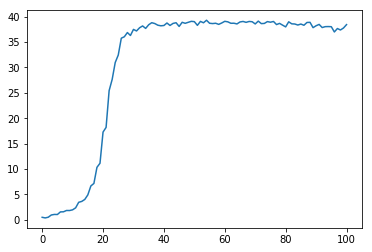

Total score (averaged over agents) this episode: 38.44549914067611


In [3]:
from collections import deque
import time
import matplotlib.pyplot as plt
%matplotlib inline
avg_reward = deque(maxlen=100)
max_step = 100
epoches = 200
scores_all=[]
for epoch in range(epoches):
    env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations
    scores = np.zeros(num_agents)
    for agent_no in range(num_agents//5):
        agent[agent_no].reset()
    
    start_time = time.time()
    for i in range(1000):
        actions = []
        for agent_no in range(num_agents//5):
            actions.extend(agent[agent_no].policy(states[agent_no*5:agent_no*5+5,:]))# select an action (for each agent)
        actions = np.array(actions)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        for j in range(num_agents):
            replaybuffer.Add(states[j,:], actions[j], rewards[j], next_states[j,:], dones[j])
        if(i%20==0 and len(replaybuffer)>1024):
            for agent_no in range(num_agents//5):
                #print(agent_no)
                for _ in range(10):
                    agent[agent_no].learn()
                #agent[agent_no].update_lr()
        
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    avg_reward.append(np.mean(scores))
    scores_all.append(np.mean(scores))
    duration = time.time() - start_time
    total_average_score=np.mean(avg_reward)
    mean_score=np.mean(scores)
    min_score=np.min(scores)
    max_score=np.max(scores)
    print('\rEpisode {}\tTotal Average Score: {:.2f}\tMean: {:.2f}\tMin: {:.2f}\tMax: {:.2f}\tDuration: {:.2f}'
              .format(epoch, total_average_score, mean_score, min_score, max_score, duration))
    if total_average_score >= 30.0 and epoch >= 100:
        print('Problem Solved after {} epsisodes!! Total Average score: {:.2f}'.format(epoch, total_average_score))
        torch.save(agent[0].actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent[0].critic_local.state_dict(), 'checkpoint_critic.pth')
        break
    
plt.plot(scores_all)
plt.show()
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

In [7]:
trained_agent = DDPGAgent(1024,states.shape[1],action_size,replaybuffer)
trained_agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
trained_agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

In [12]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
trained_agent.actor_local.eval()
while True:
    tstates = torch.from_numpy(states).to(torch.float32)
    actions = trained_agent.actor_local(tstates).detach().numpy() # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 38.785999133065346


In [13]:
env.close()